In [258]:
from  matplotlib import pyplot as plt 
import numpy as np 
from scipy import ndimage as ndim 

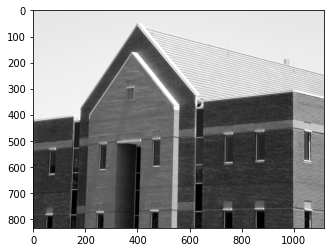

In [259]:
f = plt.imread("./../images/building-cropped-834by1114.tif")
plt.imshow(f , "gray")

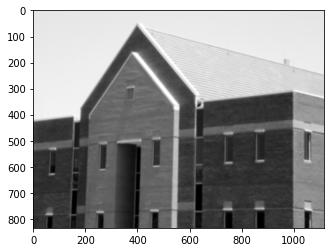

In [260]:
# Gauss Blur 
f = f.copy()
g = ndim.gaussian_filter(f , sigma =2)

plt.imshow(g,"gray")

In [261]:
# 计算 x,y方向上的梯度
def gradient(f):
    h,w = f.shape 
    gradient_x_kernel = np.array ([
    [
        -1 , -2 , -1
    ],[
        0 , 0 , 0
    ],[
       1, 2, 1
    ]
    ])
    gx = ndim.convolve(f,gradient_x_kernel,mode ="constant")

    gradient_y_kernel = np.array([     
    [
        -1, 0, 1
    ],[
        -2,0,2
    ],[
        -1,0,1
    ]
    ])

    gy =  ndim.convolve(f,gradient_y_kernel , mode="constant")
    return gx ,gy

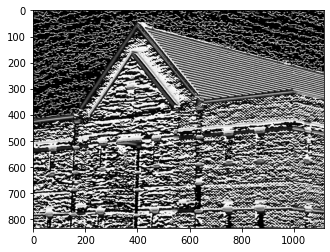

In [262]:
gx, gy = gradient(g)
plt.imshow(gx , 'gray')

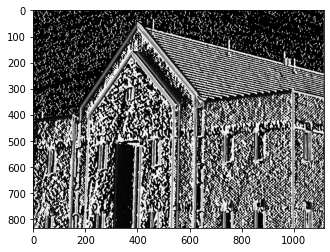

In [263]:
plt.imshow(gy , "gray")

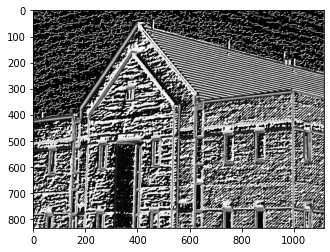

In [264]:
# 幅度图
def magnitude(gx , gy):   
    m = np.abs(gx) + np.abs(gy)
    return m 
m = magnitude(gx , gy)
m = m / m.max() * 255
plt.imshow(m , "gray")

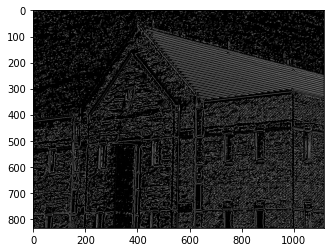

In [265]:

"""
tan 算出梯度方向
"""
def direction (gx,gy):
    
    return np.arctan2(gx,gy)

# 非极大化抑制    
def non_max_suppression(m , d):
    h,w = m.shape 
    res = np.zeros([h,w])    
    piece = np.pi / 8
    for y in range(1,h-1):
        for x in range(1,w-1):
            theta = d[y][x]
            current  = m[y][x]
            before = 0 
            after = 0             
            if 0 <= theta < piece or 6 * piece <= theta < np.pi:
                before = m[y][x -1 ]
                after = m[y][x + 1]
            if piece <= theta < piece * 3:
                before = m[ y + 1] [x - 1]
                after = m[y-1][x + 1]
            if piece * 3 <= theta < piece  * 5:
                before = m[y-1][x]
                after = m [y+1][x]
            if  5 * piece <= theta < 7 * piece:
                before = m[y-1][x-1]
                after = m[y+1][x+1]

            if current > after and current > before:
                 res[y][x] = current
            else : 
                res[y][x] = 0
    return res

d = direction(gx,  gy)

nm = non_max_suppression(m,d)
plt.imshow(nm , "gray")

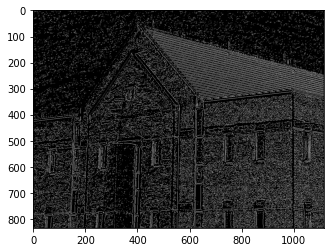

In [266]:
## 双门限处理
def threshold(g , low_threshold_ratio = 0.05 , high_threshold_radio = 1):
    high_threshold = g.max() * high_threshold_radio
    low_threshold = high_threshold * low_threshold_ratio

    res = np.zeros(g.shape)

    weak = 25 
    strong = 255 

    strong_y , strong_x = np.where(g > high_threshold)
    zeros_y , zeros_x = np.where(g < low_threshold)

    weak_y , weak_x = np.where((g <= high_threshold) & (g>=low_threshold))

    res[strong_y,strong_x] = strong
    res[weak_y , weak_x] = weak

    return res 

res = threshold(nm )

plt.imshow(res,"gray" )
